In [1]:
 # Import Libraries
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.svm import SVC



In [2]:
# Plot a re-usable functions

def plot_auc_and_confusion_matrix(y_true, y_pred_proba, y_pred):
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc_score            = roc_auc_score(y_true, y_pred_proba)
    
    # Plot AUC Curve
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', label='AUC = {:.2f}'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Curve')
    plt.legend(loc='lower right')
    
    # Plot Confusion Matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=plt.gca(), cmap='Blues')
    plt.title('Confusion Matrix')
    
    plt.tight_layout()
    plt.show()

    # Print Classification Report
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred))


**Linear SVM Classification (Iris Dataset)**

The Iris dataset is widely used for classification. It contains 150 samples of iris flowers, with 4 features: sepal length, sepal width, petal length, and petal width. We will use only two features for simplicity and binary classification (setosa vs. versicolor).

In [3]:
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for easy visualization
y = iris.target

In [4]:
# For binary classification, select only two classes (Setosa and Versicolor)
mask = y < 2
X, y = X[mask], y[mask]

- Scaling is beneficial when you work with models that use distance metrics i.e SVM

In [5]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train Linear SVM**

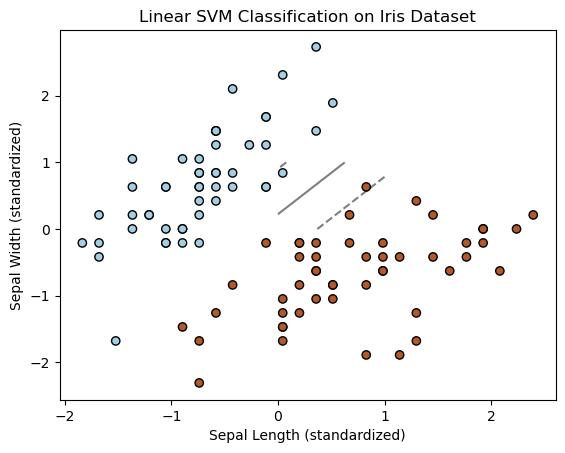

In [6]:

clf = SVC(kernel='linear',probability=True) # solution should be a straight linear, is not an ideal scenario for the real world setting.
clf.fit(X_train, y_train)


# Plotting decision boundary
plt.figure()  #-----------------------> Creates a new figure for plotting
ax   = plt.gca() #--------------------> Gets the current Axes instance on the current figure
xlim = ax.get_xlim()  
ylim = ax.get_ylim()   #get the x and y limits of the plot, respectively.

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500)) #Generates a coordinate grid


# Computing the Decision Function
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #oncatenates the flattened xx and yy arrays to create a list of all grid points
 
 #NB ravel() flattens a multi-dimensional array into a one-dimensional array
Z = Z.reshape(xx.shape)# reshapes Z back into the grid shape for contour plotting

# plotting the Decision Boundary and Data Points
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Linear SVM Classification on Iris Dataset')
plt.show()


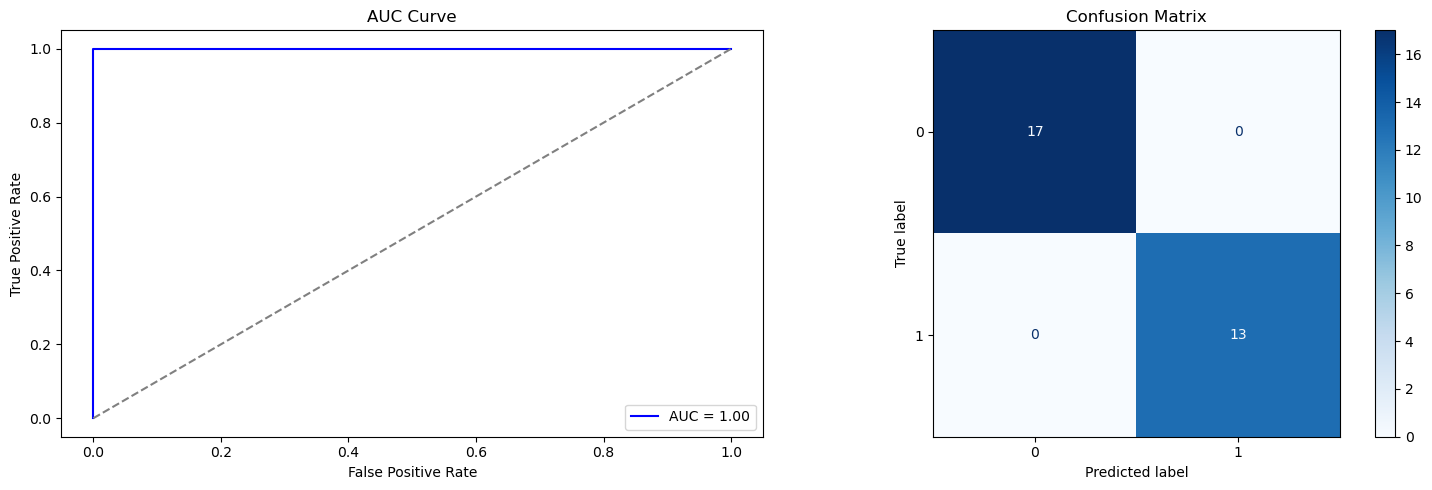

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
# Predict probabilities and labels
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred = clf.predict(X_test)

# Plot AUC and Confusion Matrix
plot_auc_and_confusion_matrix(y_test, y_pred_proba, y_pred)

**Soft margin SVM allows for some misclassification. Here we use a different C parameter value to demonstrate its effect**

- Introduce a parameter that allows us to see misclassification.

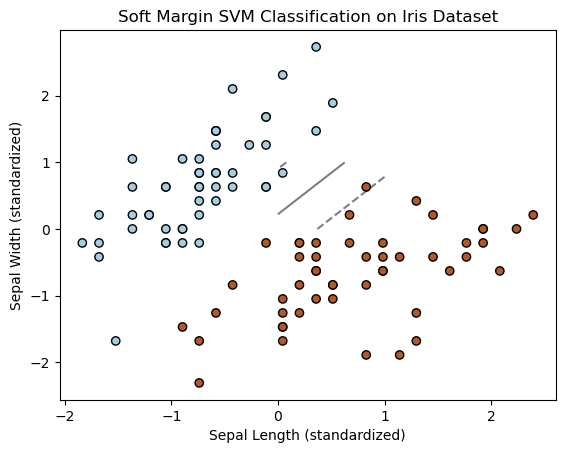

In [8]:
# Train Soft Margin SVM with different C value


clf_soft = SVC(kernel='linear', C=1, probability=True)  
clf_soft.fit(X_train, y_train)

# Plotting decision boundary
plt.figure()
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = clf_soft.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Soft Margin SVM Classification on Iris Dataset')
plt.show()


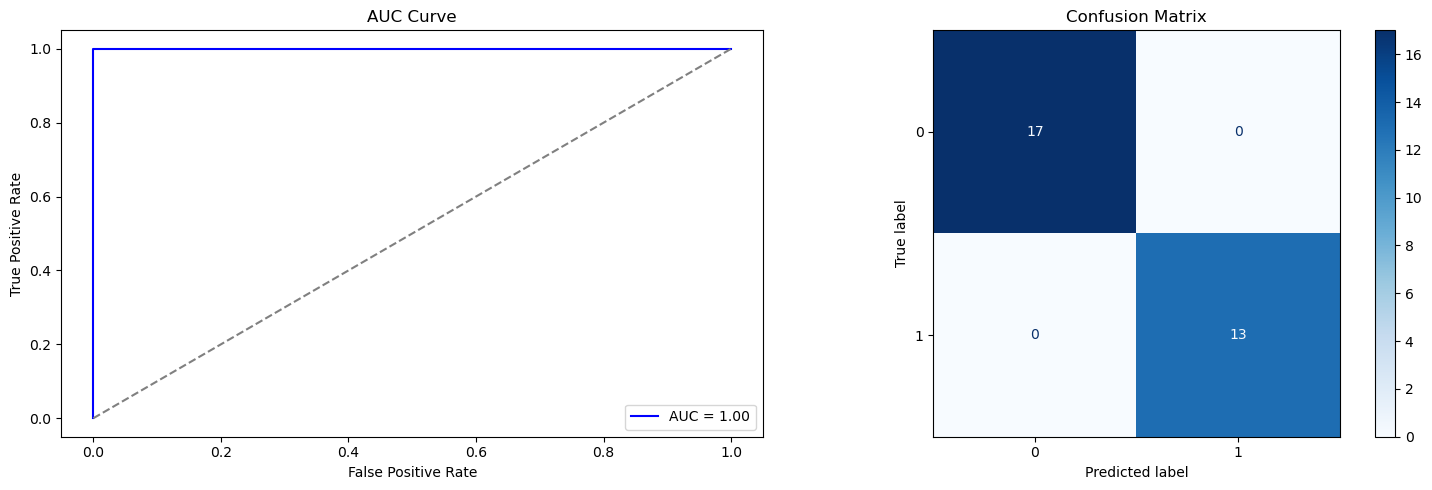

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
# Predict probabilities and labels
y_pred_proba_soft = clf_soft.predict_proba(X_test)[:, 1]
y_pred_soft = clf_soft.predict(X_test)

# Plot AUC, Confusion Matrix, and Classification Report
plot_auc_and_confusion_matrix(y_test, y_pred_proba_soft, y_pred_soft)

Nonlinear SVM Classification (Wine Quality Dataset)

For nonlinear SVM classification, we will use the Wine Quality dataset from the UCI Machine Learning Repository. It contains 11 features related to the chemical properties of wines and their quality ratings.

In [11]:
# Load Wine Quality dataset from OpenML
wine = fetch_openml(name='wine-quality-red',parser='auto')
X = wine.data
y = wine.target

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:102: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/wine-quality-red/limit/2/status/active/. Retrying...
  warn(


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [143]:
# Convert target to binary classification problem: Good (quality > 5) or Bad (quality <= 5)
y = (y.astype(int) > 5).astype(int)

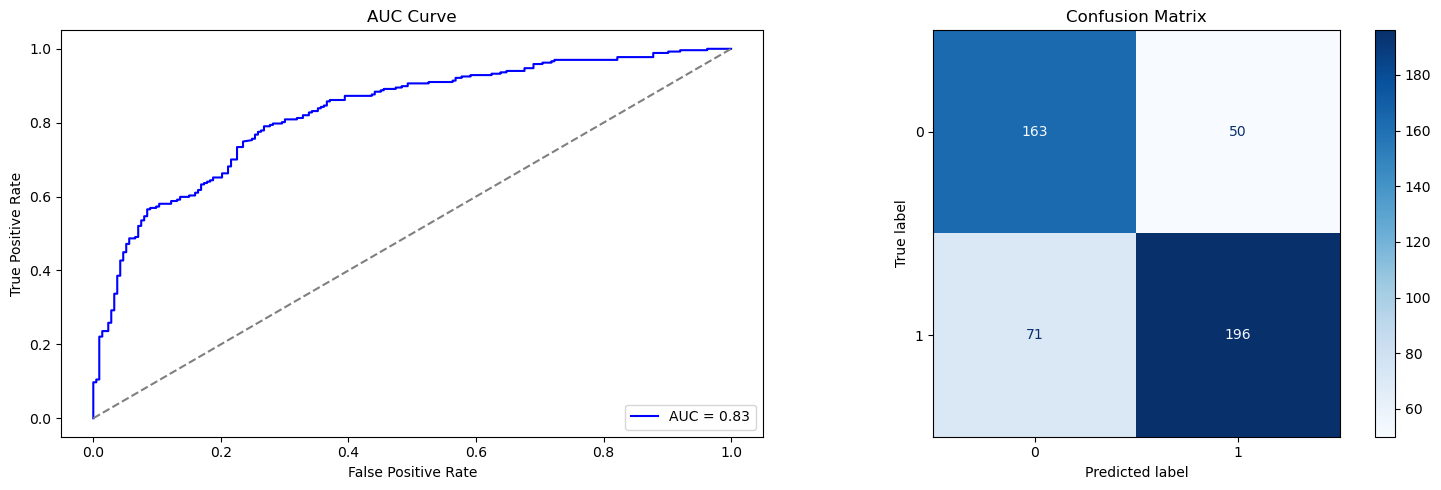

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       213
           1       0.80      0.73      0.76       267

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [144]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Nonlinear SVM with RBF kernel
clf_rbf = SVC(kernel='rbf', gamma='scale',probability=True)
clf_rbf.fit(X_train, y_train)


y_pred_proba_rbf = clf_rbf.predict_proba(X_test)[:, 1]
y_pred_rbf = clf_rbf.predict(X_test)

# Plot AUC, Confusion Matrix, and Classification Report
plot_auc_and_confusion_matrix(y_test, y_pred_proba_rbf, y_pred_rbf)

 Polynomial Kernel (Wine Quality Dataset)

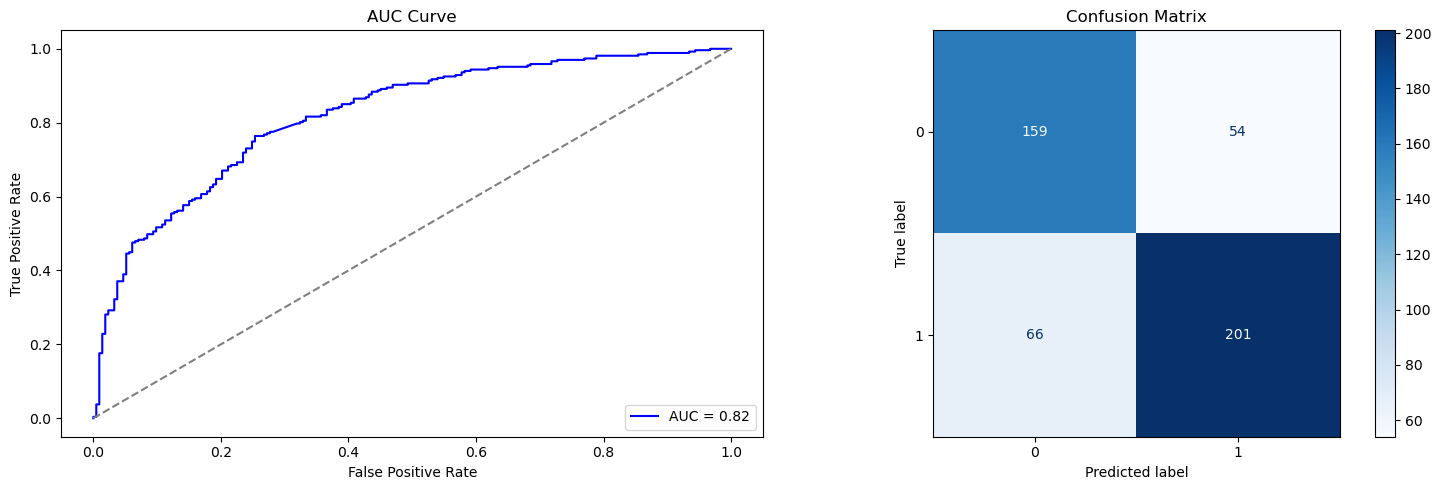

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       213
           1       0.79      0.75      0.77       267

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [145]:
# Train SVM with Polynomial Kernel

clf_poly = SVC(kernel='poly', degree=3, gamma='scale',probability=True)
clf_poly.fit(X_train, y_train)

y_pred_proba_poly = clf_poly.predict_proba(X_test)[:, 1]
y_pred_poly = clf_poly.predict(X_test)

# Plot AUC, Confusion Matrix, and Classification Report
plot_auc_and_confusion_matrix(y_test, y_pred_proba_poly, y_pred_poly)
